In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

c:\users\user\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
plt.style.use('fivethirtyeight')

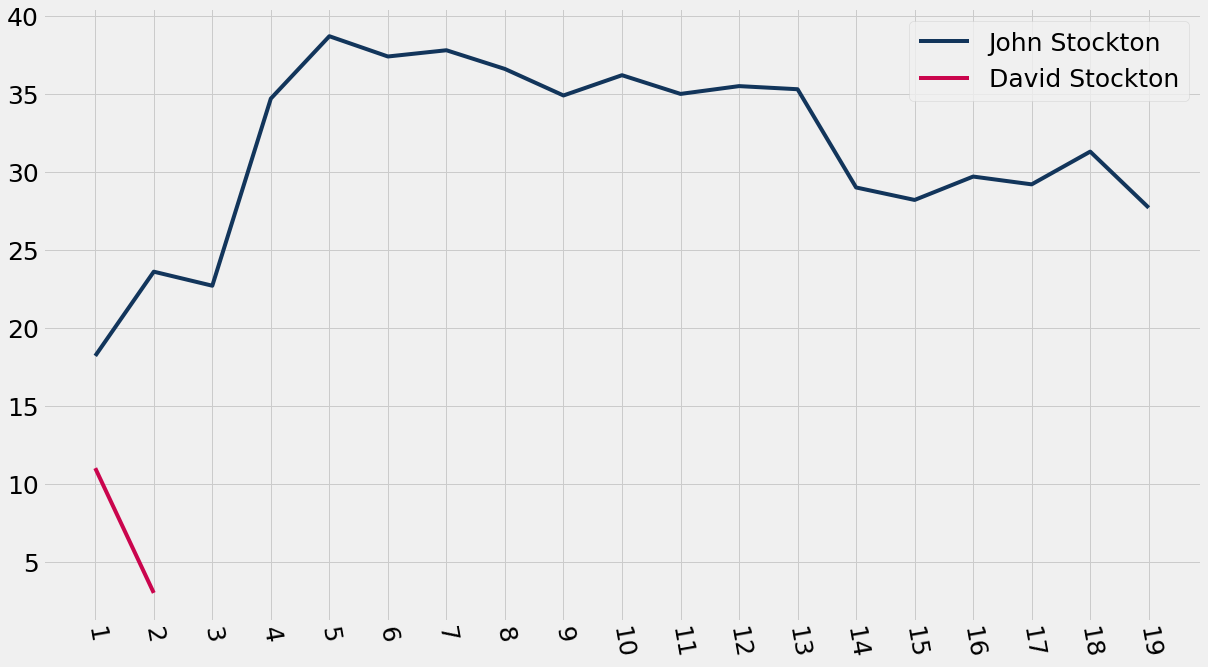

In [114]:
url1 ='https://www.basketball-reference.com/players/s/stockjo01.html'
url2 = 'https://www.basketball-reference.com/players/s/stockda01.html'
pl1 = 'John Stockton'
pl2 = 'David Stockton'

web = requests.get(url1)
web2 = requests.get(url2)

content = web.content
content2 = web2.content

soup = BeautifulSoup(content,'html.parser')
soup2 = BeautifulSoup(content2,'html.parser')

html = soup.find(name='table',attrs={'id':'per_game'})
html2 = soup2.find(name='table',attrs={'id':'per_game'})

data = pd.read_html(str(html))[0]
data2 = pd.read_html(str(html2))[0]

career = data[data['Season']=='Career']
career2 = data2[data2['Season']=='Career']

playing = data[data['Age'].notnull()]
playing2 = data2[data2['Age'].notnull()]

year = max(len(playing),len(playing2))
# draw the compare line
playing['MP'].index+=1
playing2['MP'].index+=1
plt.plot(playing['MP'],color='#12355B')
plt.plot(playing2['MP'],color='#CA054D')
plt.xticks(rotation=280)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# plot.gca().invert_xaxis
plt.xticks(fontsize=25)
new_ticks = np.linspace(1, year, year)
plt.xticks(new_ticks)
plt.yticks(fontsize=25)
plt.legend([pl1,pl2],loc = 0, prop = {'size':25})



In [105]:
p1_pts = career['PTS'].values[0]
p1_reb = career['TRB'].values[0]
p1_ast = career['AST'].values[0]
p1_2p = career['2P%'].values[0]
p1_3p = career['3P%'].values[0]
p1_ft = career['FT%'].values[0]
p2_pts = career2['PTS'].values[0]
p2_reb = career2['TRB'].values[0]
p2_ast = career2['AST'].values[0]
p2_2p = career2['2P%'].values[0]
p2_3p = career2['3P%'].values[0]
p2_ft = career2['FT%'].values[0]

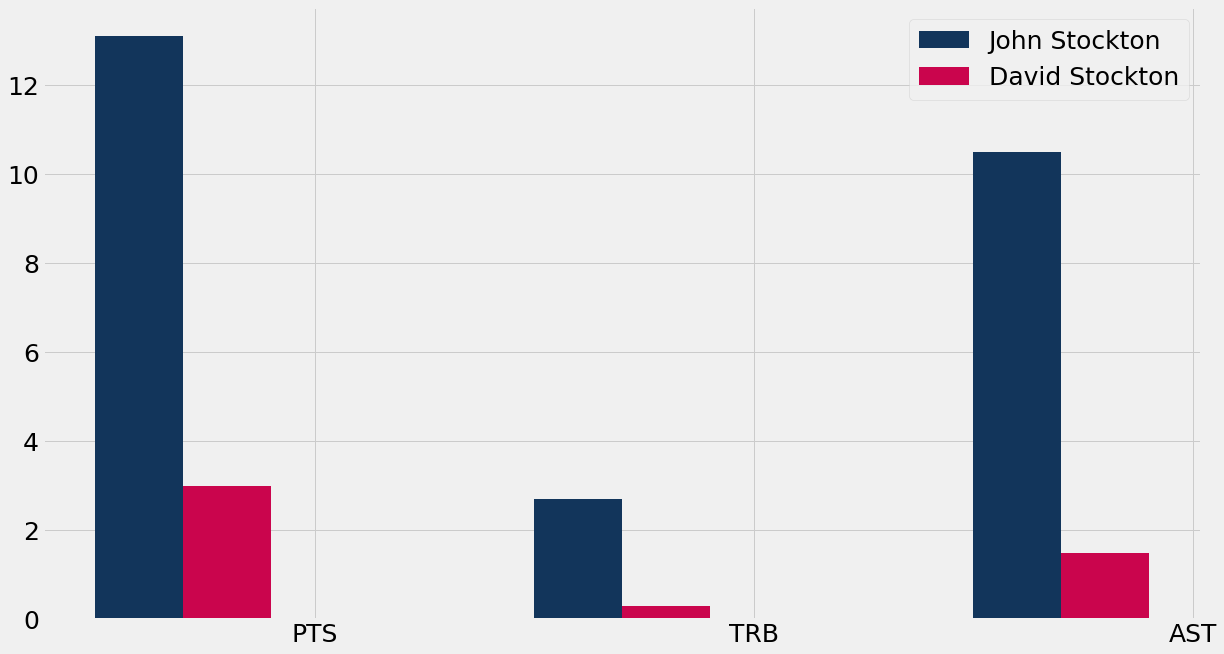

In [115]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18.5, 10.5)

player1 = [p1_pts, p1_reb, p1_ast]
rects1 = ax.bar(ind, player1, width, color='#12355B')
player2 = [p2_pts, p2_reb, p2_ast]
rects2 = ax.bar(ind+width, player2, width, color='#CA054D')
# pts = [37,32,40,50,24]
# rects3 = ax.bar(ind+width*2, pts, width, color='#2e5fff')
# avals = [1, 9, 2,7]
# rects4 = ax.bar(ind+width*3, avals, width, color='#26bec9')

# ax.set_ylabel('Scores')
ax.set_xticks(ind+width*2)
ax.set_xticklabels( ('PTS', 'TRB', 'AST'))
ax.tick_params(labelsize=25)
ax.legend( (rects1[0], rects2[0]), (pl1, pl2) ,prop = {'size':25})


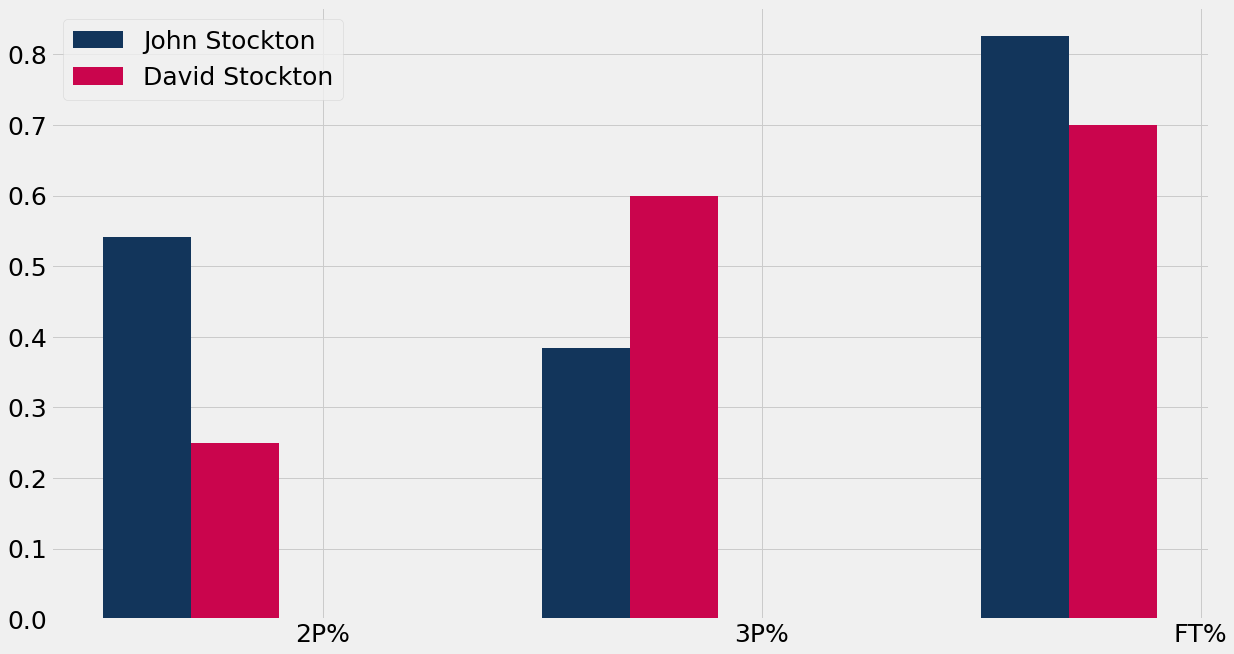

In [117]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18.5, 10.5)

player1 = [p1_2p,p1_3p,p1_ft]
rects1 = ax.bar(ind, player1, width, color='#12355B')
player2 = [p2_2p,p2_3p,p2_ft]
rects2 = ax.bar(ind+width, player2, width, color='#CA054D')
# pts = [37,32,40,50,24]
# rects3 = ax.bar(ind+width*2, pts, width, color='#2e5fff')
# avals = [1, 9, 2,7]
# rects4 = ax.bar(ind+width*3, avals, width, color='#26bec9')

# ax.set_ylabel('Scores')
ax.set_xticks(ind+width*2)
ax.set_xticklabels(('2P%','3P%','FT%'))
ax.tick_params(labelsize=25)
ax.legend( (rects1[0], rects2[0]), (pl1, pl2),prop = {'size':25} )


In [118]:
# RIVERS

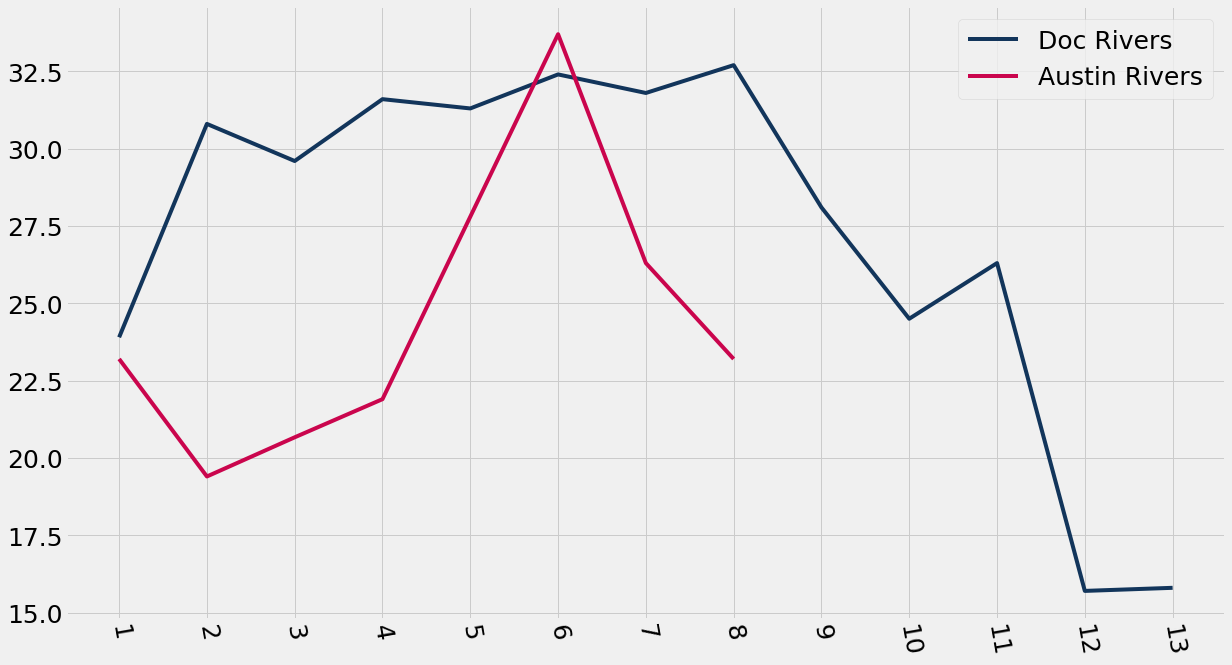

In [155]:
url1 ='https://www.basketball-reference.com/players/r/riverdo01.html'
url2 = 'https://www.basketball-reference.com/players/r/riverau01.html'
pl1 = 'Doc Rivers'
pl2 = 'Austin Rivers'

web = requests.get(url1)
web2 = requests.get(url2)

content = web.content
content2 = web2.content

soup = BeautifulSoup(content,'html.parser')
soup2 = BeautifulSoup(content2,'html.parser')

html = soup.find(name='table',attrs={'id':'per_game'})
html2 = soup2.find(name='table',attrs={'id':'per_game'})

data = pd.read_html(str(html))[0]
data2 = pd.read_html(str(html2))[0]

career = data[data['Season']=='Career']
career2 = data2[data2['Season']=='Career']

playing = data[data['Age'].notnull()]
playing2 = data2[data2['Age'].notnull()]


# avoid TOT
play_game1={}
x=1
season_check=[]
for i in playing['Season']:
    if i not in season_check:
        mp = playing[playing['Season']==i]['MP'].mean()
        play_game1[x]=mp
        x+=1
        season_check.append(i)

player1_game = pd.Series(play_game1)

play_game2={}
x=1
season_check=[]
for i in playing2['Season']:
    if i not in season_check:
        mp = playing2[playing2['Season']==i]['MP'].mean()
        play_game2[x]=mp
        x+=1
        season_check.append(i)

player2_game = pd.Series(play_game2)


year = max(len(player1_game),len(player2_game))
# draw the compare line
# playing['MP'].index+=1
# playing2['MP'].index+=1
plt.plot(player1_game,color='#12355B')
plt.plot(player2_game,color='#CA054D')
plt.xticks(rotation=280)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# plot.gca().invert_xaxis
plt.xticks(fontsize=25)
new_ticks = np.linspace(1, year, year)
plt.xticks(new_ticks)
plt.yticks(fontsize=25)
plt.legend([pl1,pl2],loc = 0, prop = {'size':25})



In [156]:
p1_pts = career['PTS'].values[0]
p1_reb = career['TRB'].values[0]
p1_ast = career['AST'].values[0]
p1_2p = career['2P%'].values[0]
p1_3p = career['3P%'].values[0]
p1_ft = career['FT%'].values[0]
p2_pts = career2['PTS'].values[0]
p2_reb = career2['TRB'].values[0]
p2_ast = career2['AST'].values[0]
p2_2p = career2['2P%'].values[0]
p2_3p = career2['3P%'].values[0]
p2_ft = career2['FT%'].values[0]

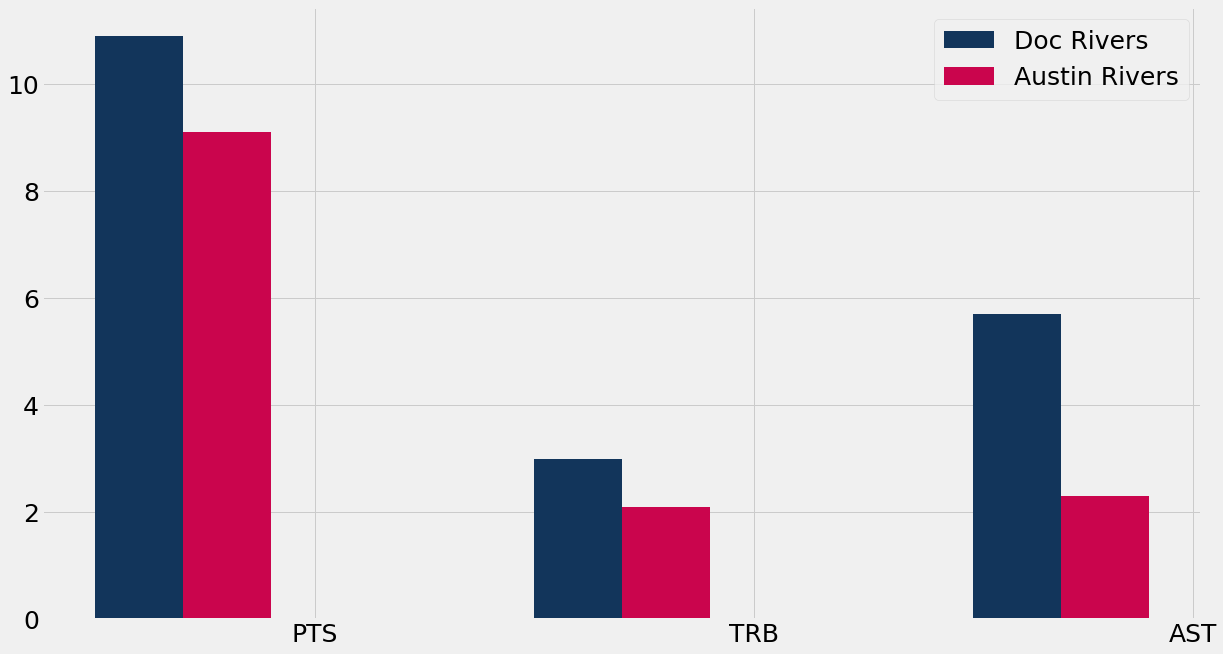

In [157]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18.5, 10.5)

player1 = [p1_pts, p1_reb, p1_ast]
rects1 = ax.bar(ind, player1, width, color='#12355B')
player2 = [p2_pts, p2_reb, p2_ast]
rects2 = ax.bar(ind+width, player2, width, color='#CA054D')
# pts = [37,32,40,50,24]
# rects3 = ax.bar(ind+width*2, pts, width, color='#2e5fff')
# avals = [1, 9, 2,7]
# rects4 = ax.bar(ind+width*3, avals, width, color='#26bec9')

# ax.set_ylabel('Scores')
ax.set_xticks(ind+width*2)
ax.set_xticklabels( ('PTS', 'TRB', 'AST'))
ax.tick_params(labelsize=25)
ax.legend( (rects1[0], rects2[0]), (pl1, pl2) ,prop = {'size':25})


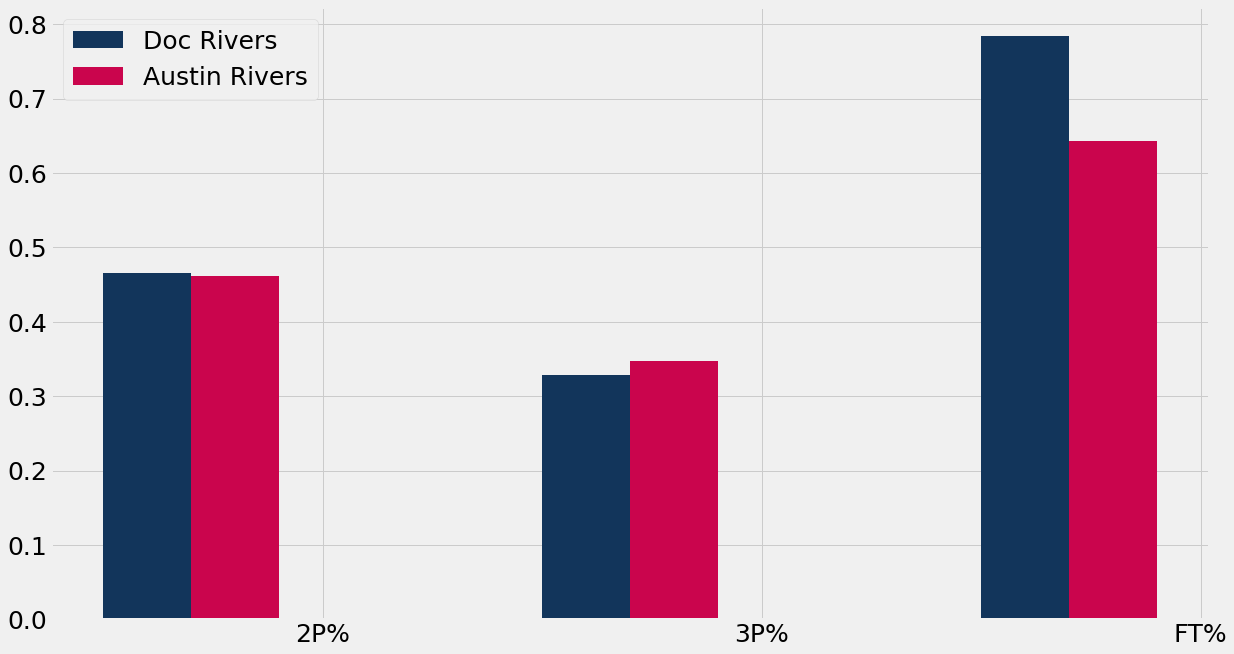

In [158]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18.5, 10.5)

player1 = [p1_2p,p1_3p,p1_ft]
rects1 = ax.bar(ind, player1, width, color='#12355B')
player2 = [p2_2p,p2_3p,p2_ft]
rects2 = ax.bar(ind+width, player2, width, color='#CA054D')
# pts = [37,32,40,50,24]
# rects3 = ax.bar(ind+width*2, pts, width, color='#2e5fff')
# avals = [1, 9, 2,7]
# rects4 = ax.bar(ind+width*3, avals, width, color='#26bec9')

# ax.set_ylabel('Scores')
ax.set_xticks(ind+width*2)
ax.set_xticklabels(('2P%','3P%','FT%'))
ax.tick_params(labelsize=25)
ax.legend( (rects1[0], rects2[0]), (pl1, pl2),prop = {'size':25} )


In [159]:
# CURRY

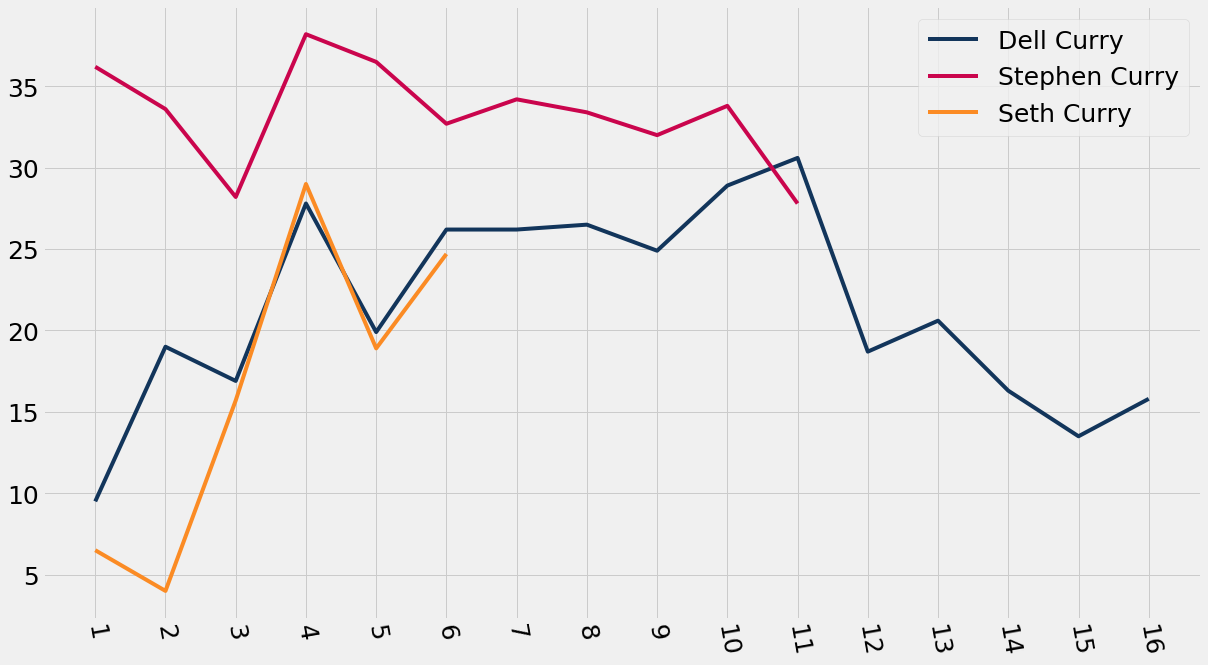

In [178]:
url1 ='https://www.basketball-reference.com/players/c/curryde01.html'
url2 = 'https://www.basketball-reference.com/players/c/curryst01.html'
url3 = 'https://www.basketball-reference.com/players/c/curryse01.html'
pl1 = 'Dell Curry'
pl2 = 'Stephen Curry'
pl3 = 'Seth Curry'

web = requests.get(url1)
web2 = requests.get(url2)
web3 = requests.get(url3)

content = web.content
content2 = web2.content
content3 = web3.content

soup = BeautifulSoup(content,'html.parser')
soup2 = BeautifulSoup(content2,'html.parser')
soup3 = BeautifulSoup(content3,'html.parser')

html = soup.find(name='table',attrs={'id':'per_game'})
html2 = soup2.find(name='table',attrs={'id':'per_game'})
html3 = soup3.find(name='table',attrs={'id':'per_game'})

data = pd.read_html(str(html))[0]
data2 = pd.read_html(str(html2))[0]
data3 = pd.read_html(str(html3))[0]

career = data[data['Season']=='Career']
career2 = data2[data2['Season']=='Career']
career3 = data3[data3['Season']=='Career']

playing = data[data['Age'].notnull()]
playing2 = data2[data2['Age'].notnull()]
playing3 = data3[data3['Age'].notnull()]


# avoid TOT
play_game1={}
x=1
season_check=[]
for i in playing['Season']:
    if i not in season_check:
        mp = playing[playing['Season']==i]['MP'].mean()
        play_game1[x]=mp
        x+=1
        season_check.append(i)

player1_game = pd.Series(play_game1)

play_game2={}
x=1
season_check=[]
for i in playing2['Season']:
    if i not in season_check:
        mp = playing2[playing2['Season']==i]['MP'].mean()
        play_game2[x]=mp
        x+=1
        season_check.append(i)

player2_game = pd.Series(play_game2)

play_game3={}
x=1
season_check=[]
for i in playing3['Season']:
    if i not in season_check:
        mp = playing3[playing3['Season']==i]['MP'].mean()
        play_game3[x]=mp
        x+=1
        season_check.append(i)

player3_game = pd.Series(play_game3)

year = max(len(player1_game),len(player2_game),len(player3_game))
# draw the compare line
# playing['MP'].index+=1
# playing2['MP'].index+=1
plt.plot(player1_game,color='#12355B')
plt.plot(player2_game,color='#CA054D')
plt.plot(player3_game,color='#FB8B24')
plt.xticks(rotation=280)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# plot.gca().invert_xaxis
plt.xticks(fontsize=25)
new_ticks = np.linspace(1, year, year)
plt.xticks(new_ticks)
plt.yticks(fontsize=25)
plt.legend([pl1,pl2,pl3],loc = 0, prop = {'size':25})



In [179]:
p1_pts = career['PTS'].values[0]
p1_reb = career['TRB'].values[0]
p1_ast = career['AST'].values[0]
p1_2p = career['2P%'].values[0]
p1_3p = career['3P%'].values[0]
p1_ft = career['FT%'].values[0]
p2_pts = career2['PTS'].values[0]
p2_reb = career2['TRB'].values[0]
p2_ast = career2['AST'].values[0]
p2_2p = career2['2P%'].values[0]
p2_3p = career2['3P%'].values[0]
p2_ft = career2['FT%'].values[0]
p3_pts = career3['PTS'].values[0]
p3_reb = career3['TRB'].values[0]
p3_ast = career3['AST'].values[0]
p3_2p = career3['2P%'].values[0]
p3_3p = career3['3P%'].values[0]
p3_ft = career3['FT%'].values[0]

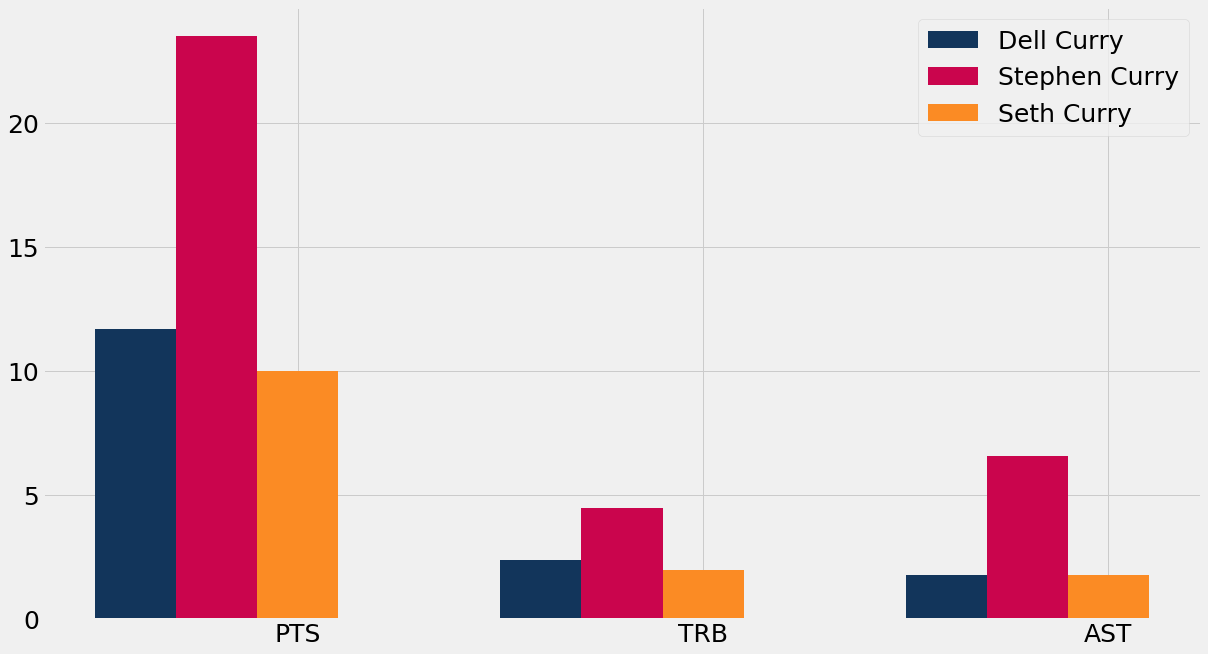

In [180]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18.5, 10.5)

player1 = [p1_pts, p1_reb, p1_ast]
rects1 = ax.bar(ind, player1, width, color='#12355B')
player2 = [p2_pts, p2_reb, p2_ast]
rects2 = ax.bar(ind+width, player2, width, color='#CA054D')
player3 = [p3_pts, p3_reb, p3_ast]
rects3 = ax.bar(ind+width*2, player3, width, color='#FB8B24')
# avals = [1, 9, 2,7]
# rects4 = ax.bar(ind+width*3, avals, width, color='#26bec9')

# ax.set_ylabel('Scores')
ax.set_xticks(ind+width*2)
ax.set_xticklabels( ('PTS', 'TRB', 'AST'))
ax.tick_params(labelsize=25)
ax.legend( (rects1[0], rects2[0], rects3[0]), (pl1, pl2, pl3) ,prop = {'size':25})


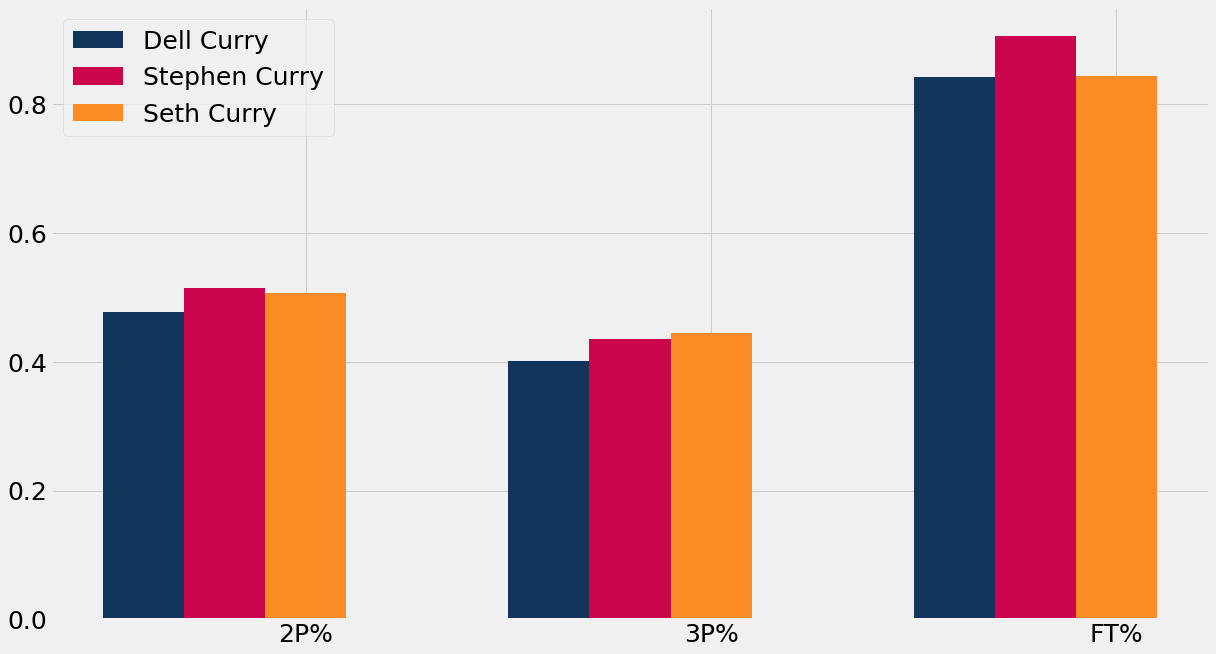

In [181]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18.5, 10.5)

player1 = [p1_2p,p1_3p,p1_ft]
rects1 = ax.bar(ind, player1, width, color='#12355B')
player2 = [p2_2p,p2_3p,p2_ft]
rects2 = ax.bar(ind+width, player2, width, color='#CA054D')
player3 = [p3_2p,p3_3p,p3_ft]
rects3 = ax.bar(ind+width*2, player3, width, color='#FB8B24')
# avals = [1, 9, 2,7]
# rects4 = ax.bar(ind+width*3, avals, width, color='#26bec9')

# ax.set_ylabel('Scores')
ax.set_xticks(ind+width*2)
ax.set_xticklabels(('2P%','3P%','FT%'))
ax.tick_params(labelsize=25)
ax.legend( (rects1[0], rects2[0], rects3[0]), (pl1, pl2, pl3) ,prop = {'size':25})


In [182]:
# THOMPSON

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


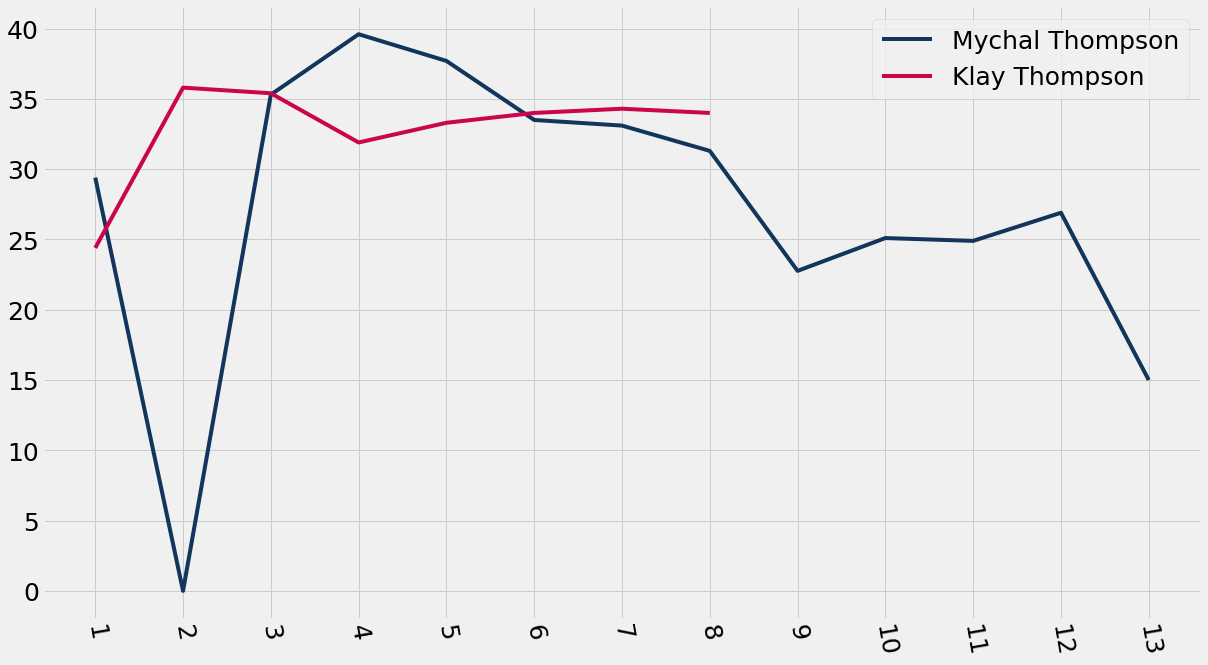

In [243]:
url1 ='https://www.basketball-reference.com/players/t/thompmy01.html'
url2 = 'https://www.basketball-reference.com/players/t/thompkl01.html'
pl1 = 'Mychal Thompson'
pl2 = 'Klay Thompson'

web = requests.get(url1)
web2 = requests.get(url2)

content = web.content
content2 = web2.content

soup = BeautifulSoup(content,'html.parser')
soup2 = BeautifulSoup(content2,'html.parser')

html = soup.find(name='table',attrs={'id':'per_game'})
html2 = soup2.find(name='table',attrs={'id':'per_game'})

data = pd.read_html(str(html))[0]
data.loc[data['Lg']!='NBA','MP']=0
data2 = pd.read_html(str(html2))[0]

career = data[data['Season']=='Career']
career2 = data2[data2['Season']=='Career']

playing = data[data['Age'].notnull()]
playing2 = data2[data2['Age'].notnull()]

# convert obj to float
col=['MP']
for c in col:
    playing[c] = playing[c].astype(float)

# avoid TOT
play_game1={}
x=1
season_check=[]
for i in playing['Season']:
    if i not in season_check:
        mp = playing[playing['Season']==i]['MP'].mean()
        play_game1[x]=mp
        x+=1
        season_check.append(i)

player1_game = pd.Series(play_game1)

play_game2={}
x=1
season_check=[]
for i in playing2['Season']:
    if i not in season_check:
        mp = playing2[playing2['Season']==i]['MP'].mean()
        play_game2[x]=mp
        x+=1
        season_check.append(i)

player2_game = pd.Series(play_game2)


year = max(len(player1_game),len(player2_game))
# draw the compare line
# playing['MP'].index+=1
# playing2['MP'].index+=1
plt.plot(player1_game,color='#12355B')
plt.plot(player2_game,color='#CA054D')
plt.xticks(rotation=280)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# plot.gca().invert_xaxis
plt.xticks(fontsize=25)
new_ticks = np.linspace(1, year, year)
plt.xticks(new_ticks)
plt.yticks(fontsize=25)
plt.legend([pl1,pl2],loc = 0, prop = {'size':25})



In [225]:
p1_pts = float(career['PTS'].values[0])
p1_reb = float(career['TRB'].values[0])
p1_ast = float(career['AST'].values[0])
p1_2p = float(career['2P%'].values[0])
p1_3p = float(career['3P%'].values[0])
p1_ft = float(career['FT%'].values[0])
p2_pts = career2['PTS'].values[0]
p2_reb = career2['TRB'].values[0]
p2_ast = career2['AST'].values[0]
p2_2p = career2['2P%'].values[0]
p2_3p = career2['3P%'].values[0]
p2_ft = career2['FT%'].values[0]

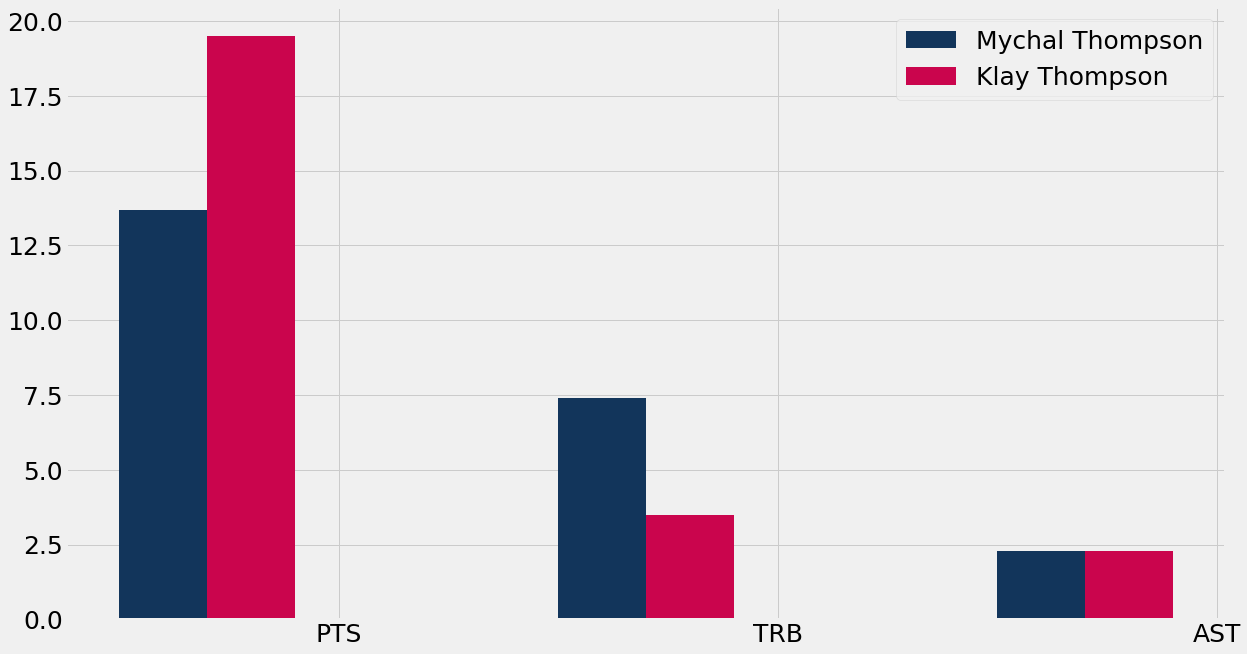

In [226]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18.5, 10.5)

player1 = [p1_pts, p1_reb, p1_ast]
rects1 = ax.bar(ind, player1, width, color='#12355B')
player2 = [p2_pts, p2_reb, p2_ast]
rects2 = ax.bar(ind+width, player2, width, color='#CA054D')
# pts = [37,32,40,50,24]
# rects3 = ax.bar(ind+width*2, pts, width, color='#2e5fff')
# avals = [1, 9, 2,7]
# rects4 = ax.bar(ind+width*3, avals, width, color='#26bec9')

# ax.set_ylabel('Scores')
ax.set_xticks(ind+width*2)
ax.set_xticklabels( ('PTS', 'TRB', 'AST'))
ax.tick_params(labelsize=25)
ax.legend( (rects1[0], rects2[0]), (pl1, pl2) ,prop = {'size':25})


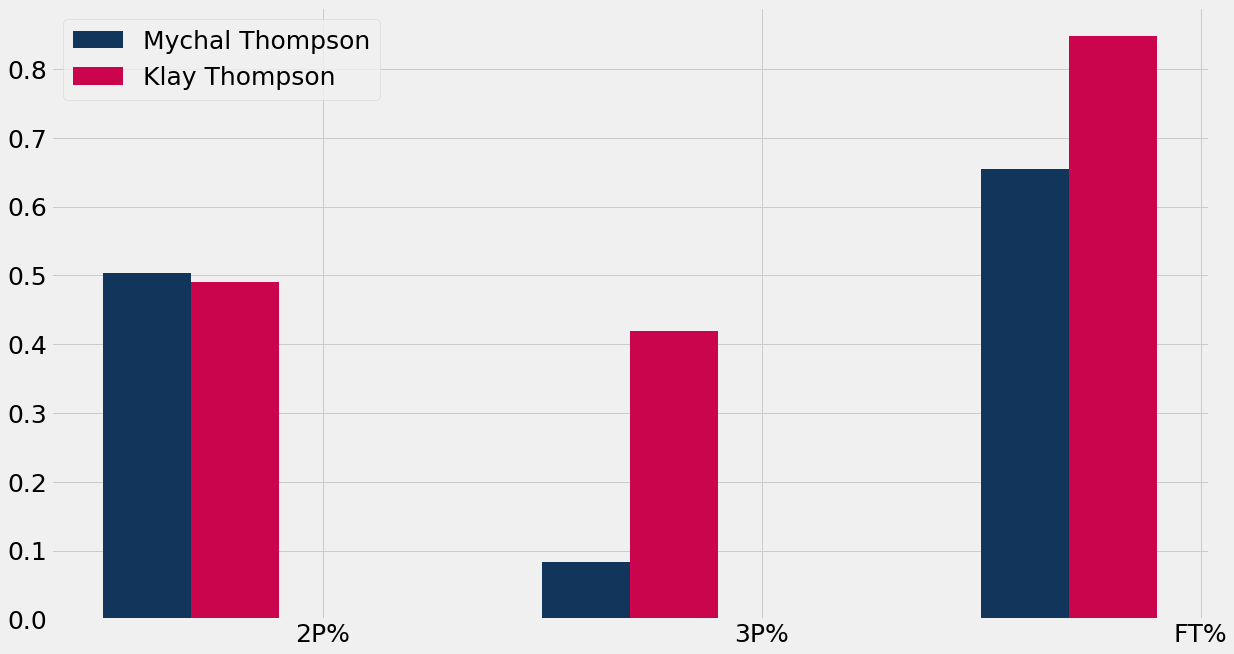

In [227]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18.5, 10.5)

player1 = [p1_2p,p1_3p,p1_ft]
rects1 = ax.bar(ind, player1, width, color='#12355B')
player2 = [p2_2p,p2_3p,p2_ft]
rects2 = ax.bar(ind+width, player2, width, color='#CA054D')
# pts = [37,32,40,50,24]
# rects3 = ax.bar(ind+width*2, pts, width, color='#2e5fff')
# avals = [1, 9, 2,7]
# rects4 = ax.bar(ind+width*3, avals, width, color='#26bec9')

# ax.set_ylabel('Scores')
ax.set_xticks(ind+width*2)
ax.set_xticklabels(('2P%','3P%','FT%'))
ax.tick_params(labelsize=25)
ax.legend( (rects1[0], rects2[0]), (pl1, pl2),prop = {'size':25} )


In [228]:
# BRYANT

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


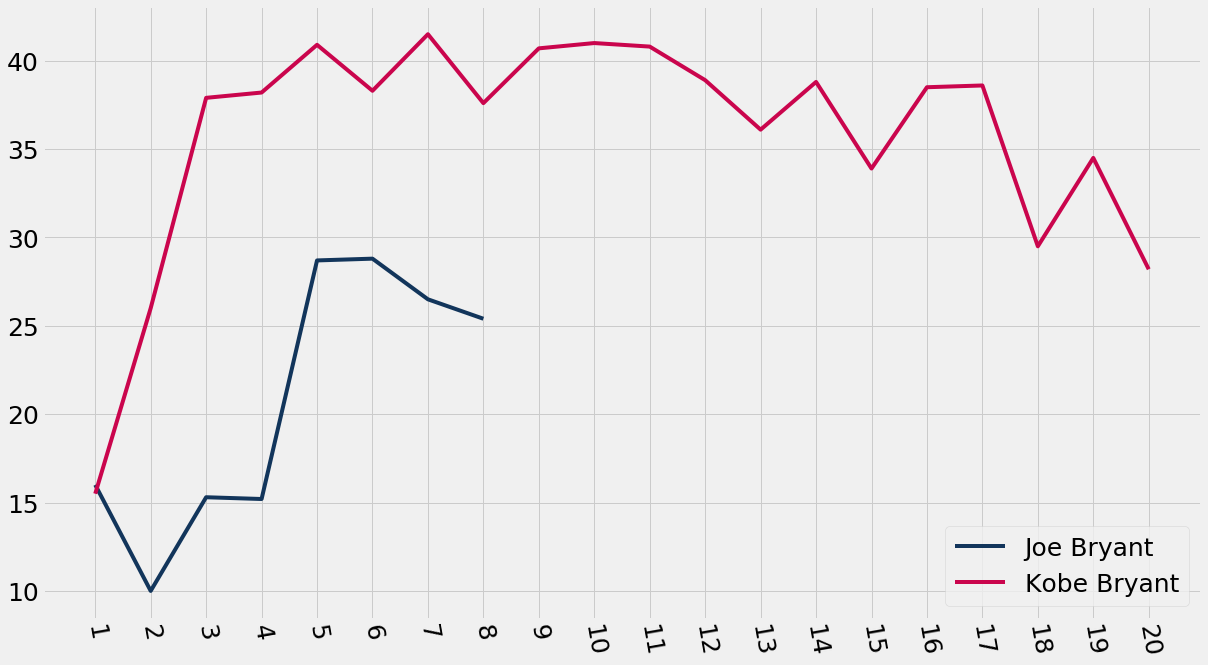

In [229]:
url1 ='https://www.basketball-reference.com/players/b/bryanjo01.html'
url2 = 'https://www.basketball-reference.com/players/b/bryanko01.html'
pl1 = 'Joe Bryant'
pl2 = 'Kobe Bryant'

web = requests.get(url1)
web2 = requests.get(url2)

content = web.content
content2 = web2.content

soup = BeautifulSoup(content,'html.parser')
soup2 = BeautifulSoup(content2,'html.parser')

html = soup.find(name='table',attrs={'id':'per_game'})
html2 = soup2.find(name='table',attrs={'id':'per_game'})

data = pd.read_html(str(html))[0]
data = data[data['Lg']=='NBA']
data2 = pd.read_html(str(html2))[0]

career = data[data['Season']=='Career']
career2 = data2[data2['Season']=='Career']

playing = data[data['Age'].notnull()]
playing2 = data2[data2['Age'].notnull()]

# convert obj to float
col=['G', 'GS', 'MP', 'FG', 'FGA', 'FG%','3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%','ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
for c in col:
    playing[c] = playing[c].astype(float)

# avoid TOT
play_game1={}
x=1
season_check=[]
for i in playing['Season']:
    if i not in season_check:
        mp = playing[playing['Season']==i]['MP'].mean()
        play_game1[x]=mp
        x+=1
        season_check.append(i)

player1_game = pd.Series(play_game1)

play_game2={}
x=1
season_check=[]
for i in playing2['Season']:
    if i not in season_check:
        mp = playing2[playing2['Season']==i]['MP'].mean()
        play_game2[x]=mp
        x+=1
        season_check.append(i)

player2_game = pd.Series(play_game2)


year = max(len(player1_game),len(player2_game))
# draw the compare line
# playing['MP'].index+=1
# playing2['MP'].index+=1
plt.plot(player1_game,color='#12355B')
plt.plot(player2_game,color='#CA054D')
plt.xticks(rotation=280)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# plot.gca().invert_xaxis
plt.xticks(fontsize=25)
new_ticks = np.linspace(1, year, year)
plt.xticks(new_ticks)
plt.yticks(fontsize=25)
plt.legend([pl1,pl2],loc = 0, prop = {'size':25})



In [230]:
p1_pts = float(career['PTS'].values[0])
p1_reb = float(career['TRB'].values[0])
p1_ast = float(career['AST'].values[0])
p1_2p = float(career['2P%'].values[0])
p1_3p = float(career['3P%'].values[0])
p1_ft = float(career['FT%'].values[0])
p2_pts = career2['PTS'].values[0]
p2_reb = career2['TRB'].values[0]
p2_ast = career2['AST'].values[0]
p2_2p = career2['2P%'].values[0]
p2_3p = career2['3P%'].values[0]
p2_ft = career2['FT%'].values[0]

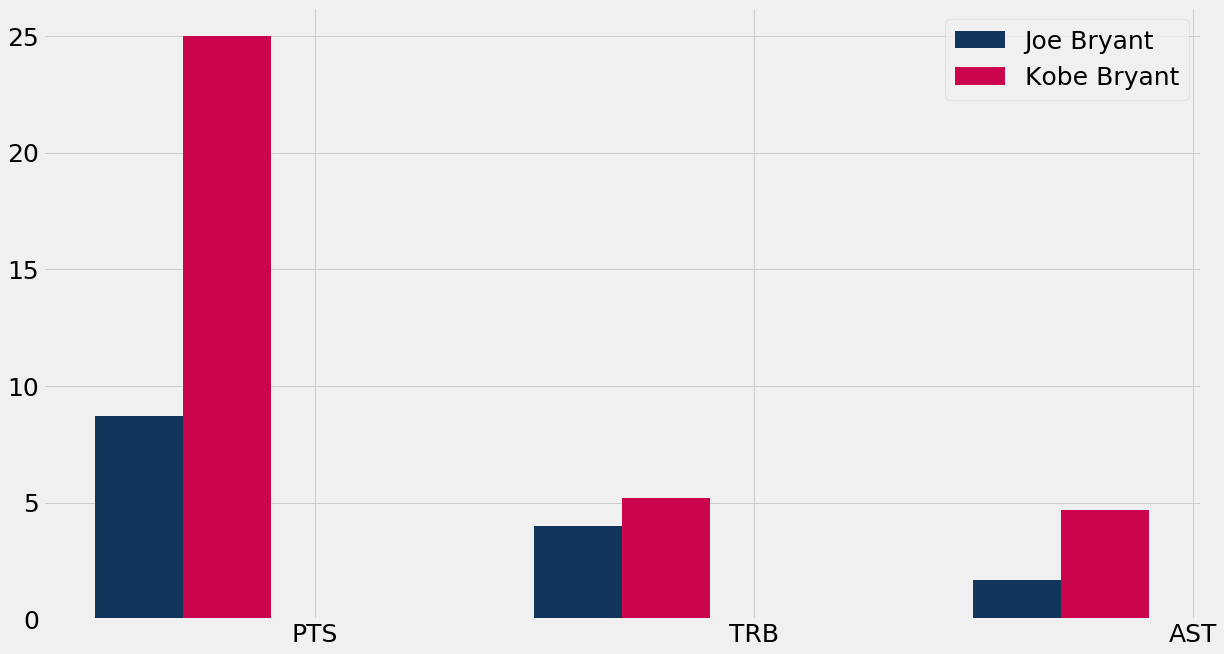

In [231]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18.5, 10.5)

player1 = [p1_pts, p1_reb, p1_ast]
rects1 = ax.bar(ind, player1, width, color='#12355B')
player2 = [p2_pts, p2_reb, p2_ast]
rects2 = ax.bar(ind+width, player2, width, color='#CA054D')
# pts = [37,32,40,50,24]
# rects3 = ax.bar(ind+width*2, pts, width, color='#2e5fff')
# avals = [1, 9, 2,7]
# rects4 = ax.bar(ind+width*3, avals, width, color='#26bec9')

# ax.set_ylabel('Scores')
ax.set_xticks(ind+width*2)
ax.set_xticklabels( ('PTS', 'TRB', 'AST'))
ax.tick_params(labelsize=25)
ax.legend( (rects1[0], rects2[0]), (pl1, pl2) ,prop = {'size':25})


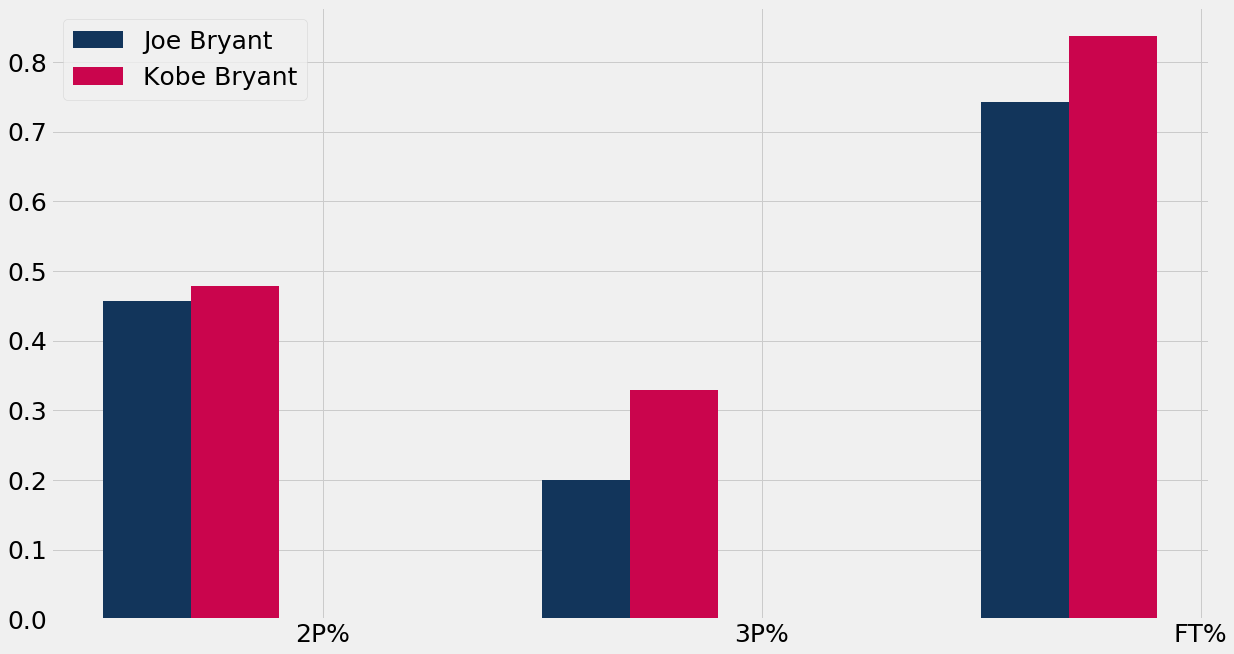

In [232]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18.5, 10.5)

player1 = [p1_2p,p1_3p,p1_ft]
rects1 = ax.bar(ind, player1, width, color='#12355B')
player2 = [p2_2p,p2_3p,p2_ft]
rects2 = ax.bar(ind+width, player2, width, color='#CA054D')
# pts = [37,32,40,50,24]
# rects3 = ax.bar(ind+width*2, pts, width, color='#2e5fff')
# avals = [1, 9, 2,7]
# rects4 = ax.bar(ind+width*3, avals, width, color='#26bec9')

# ax.set_ylabel('Scores')
ax.set_xticks(ind+width*2)
ax.set_xticklabels(('2P%','3P%','FT%'))
ax.tick_params(labelsize=25)
ax.legend( (rects1[0], rects2[0]), (pl1, pl2),prop = {'size':25} )
